In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

RESPONSE_VARS = ['Limonene']

INPUT_VARS = ['ATOB_ECOLI','ERG8_YEAST','IDI_ECOLI',
                   'KIME_YEAST','MVD1_YEAST','Q40322_MENSP',
                   'Q8LKJ3_ABIGR','Q9FD86_STAAU','Q9FD87_STAAU']

DBTL_A = ['2X-Mh', 'B-Lm', '2X-Ll', 'A-Mm', 'B-Ll', 'A-Mh', '2X-Lm',
       'A-Hl', '2X-Hh', 'B-Ml', 'B-Mm', '2X-Lh', 'B-Mh', '2X-Hl', 'B-Hl',
       '2X-Ml', 'B-Hm', 'B-Lh', 'B-Hh', 'A-Ll', 'A-Hm', '2X-Mm', 'A-Hh',
       'A-Ml', 'A-Lm',  'A-Lh', '2X-Hm']

DBTL_B = ['BL-Mm', 'BL-Mh', 'BL-Ml']

## Read and transform data

In [2]:
def read_data(path: str) -> pd.DataFrame:
    ''' Read data from csv file '''
    df = pd.read_csv(path, index_col=0)
    df = df[['Line Name', 'Type', '24.0']] # Keep only columns EDD style
    df = df.rename(columns={'24.0': 'value'}) # Rename 24.0 to value
    return df

def transform_data(df: pd.DataFrame) -> pd.DataFrame:
    ''' Get data to the right format for analysis '''
    new_columns = df['Type'].unique()
    data = pd.DataFrame()
    data.index = df['Line Name'].unique()
    # add new columns to data
    for col in new_columns:
        data[col] = 0.0
    # fill in data
    for l in data.index:
        for c in new_columns:
            value = df[(df['Line Name'] == l) & (df['Type'] == c)]['value'].values
            data.loc[l, c] = value
    # drop OD column
    data.drop('Optical Density', axis=1, inplace=True)
    return data

In [3]:
df = read_data('data/limonene_data.csv')
df = transform_data(df)
print(df.shape)
df.head()

(30, 10)


,MVD1_YEAST,Q40322_MENSP,IDI_ECOLI,ATOB_ECOLI,Q8LKJ3_ABIGR,Q9FD87_STAAU,Q9FD86_STAAU,KIME_YEAST,ERG8_YEAST,Limonene
2X-Mh,2.1936,11.20370,3.18130,0.2384,0.29680,0.74880,0.78160,0.4010,0.94130,75.39261
B-Lm,0.9010,3.55060,1.06380,0.3550,0.28700,1.02540,0.89670,0.2006,0.50610,12.75786
BL-Mm,3.1930,11.31405,2.29065,1.2554,1.63235,0.41045,0.25975,1.0486,0.58985,119.81367
2X-Ll,1.9367,3.06770,1.59950,0.0457,0.14230,0.12100,0.09980,0.2709,0.46910,5.98466
A-Mm,1.2638,6.78340,1.74950,1.4896,3.70420,5.13260,3.97700,0.3517,1.18100,9.66957


In [5]:
# DBTL 1st cycle
data_A = df[df.index.isin(DBTL_A)]
# DBTL 2st cycle
data_B = df[df.index.isin(DBTL_B)]
# Reorder columns based on specific order
data_A = data_A[INPUT_VARS + RESPONSE_VARS]
data_B = data_B[INPUT_VARS + RESPONSE_VARS]

# Save data to csv files
data_A.to_csv('data/data_A.csv')
data_B.to_csv('data/data_B.csv')

## Basic statistical analysis on data

__Distribution of every column of the 2 cycles__

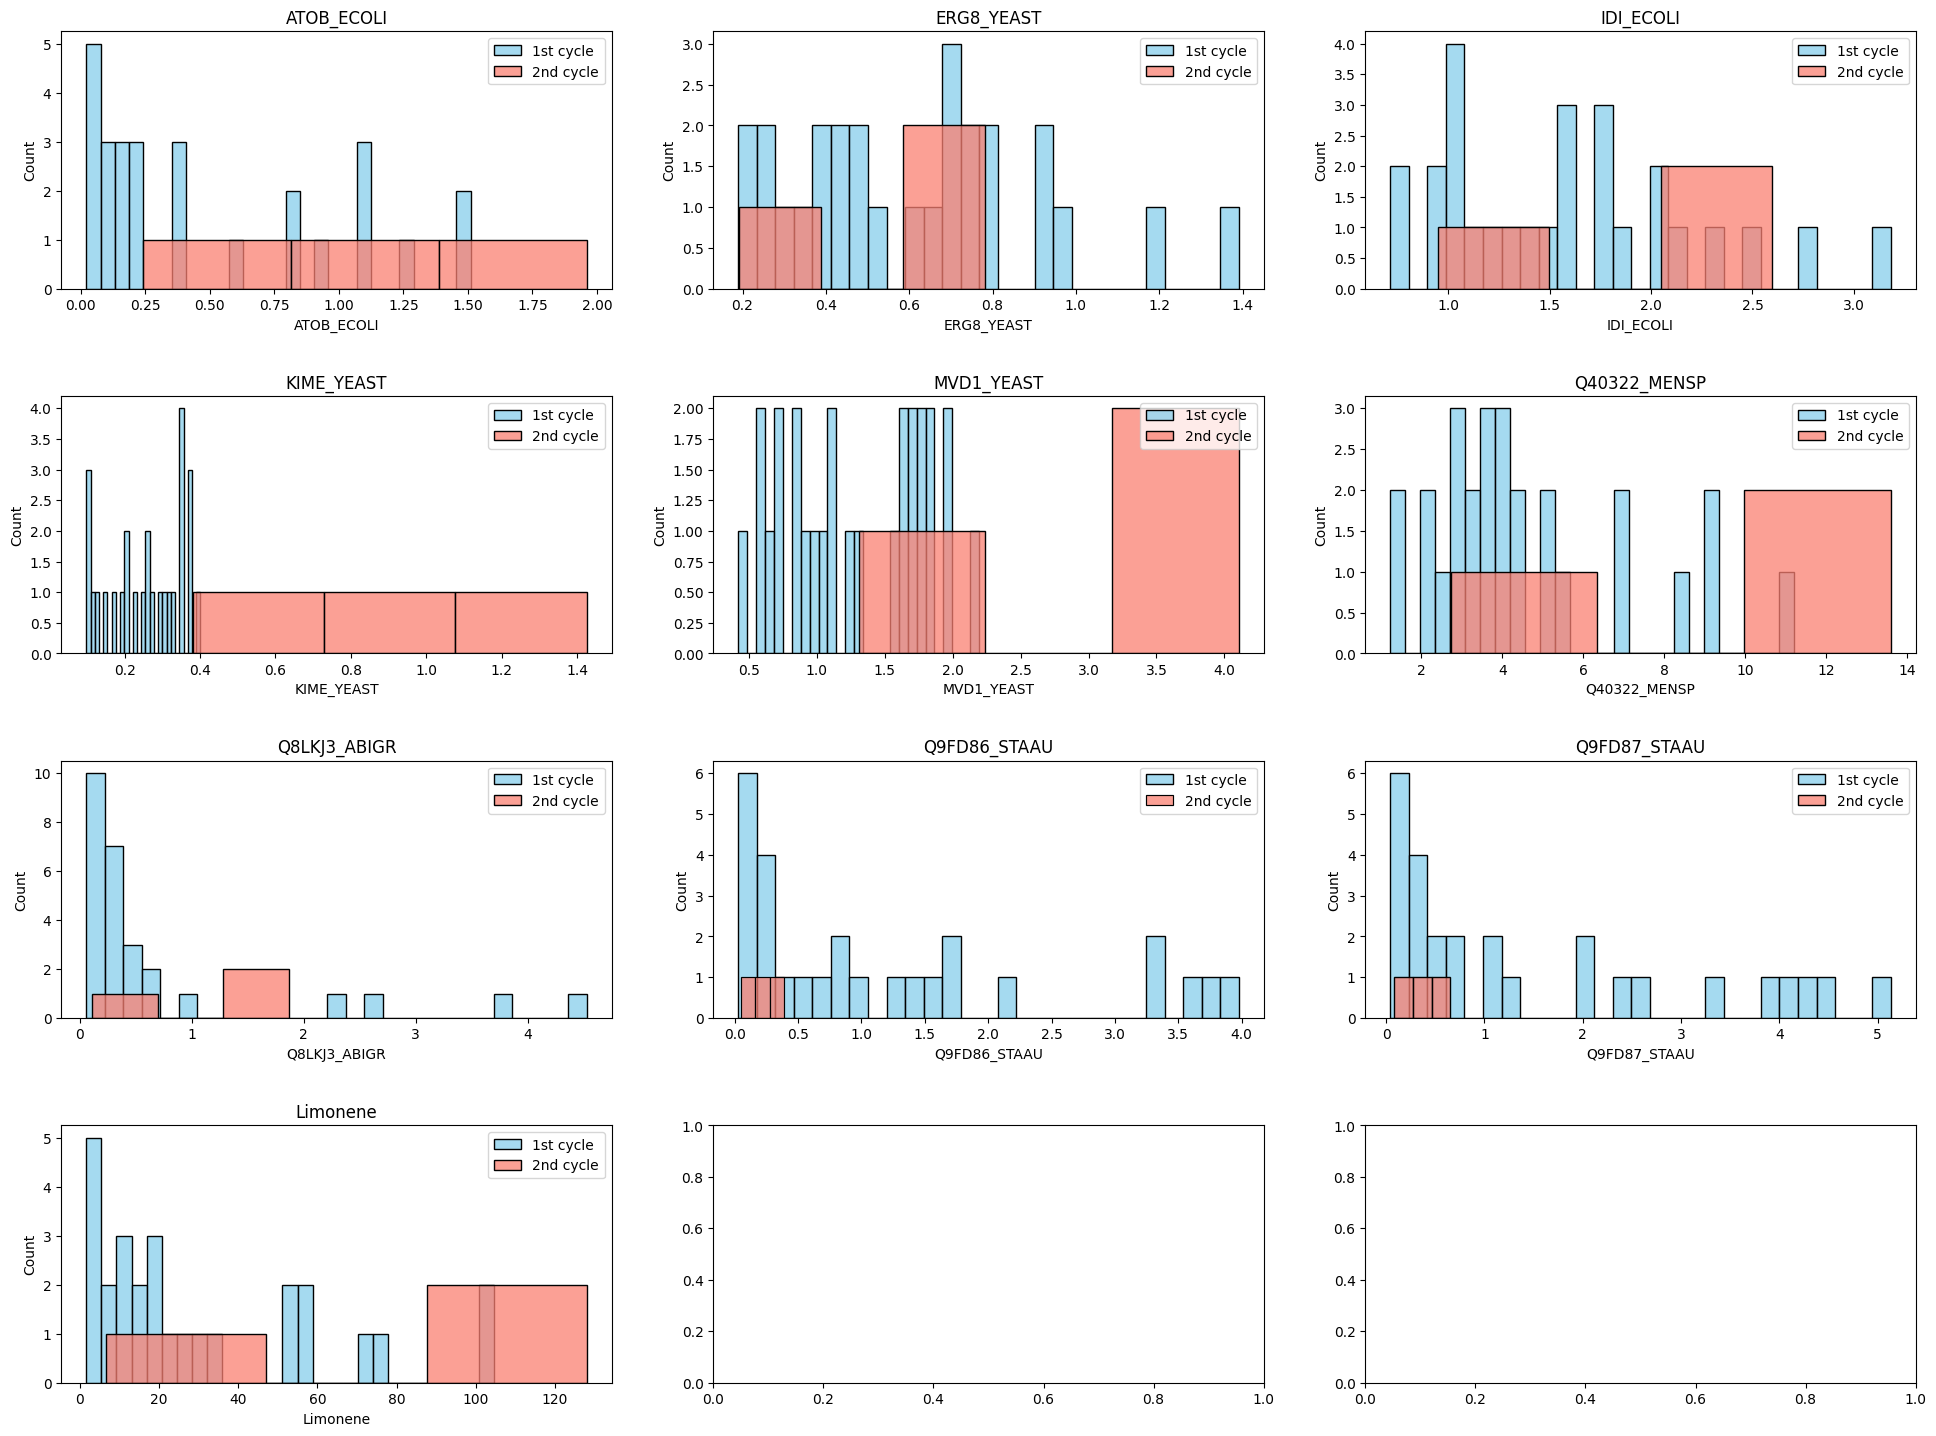

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for i, col in enumerate(data_A.columns):
    sns.histplot(data_A[col], ax=axes[i//3, i%3], bins=len(data_A), label='1st cycle', color='skyblue')
    sns.histplot(data_B[col], ax=axes[i//3, i%3], bins=len(data_B), label='2nd cycle', color='salmon')
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].legend()
fig.tight_layout(pad=3.0)
plt.show()

__Limonene production__

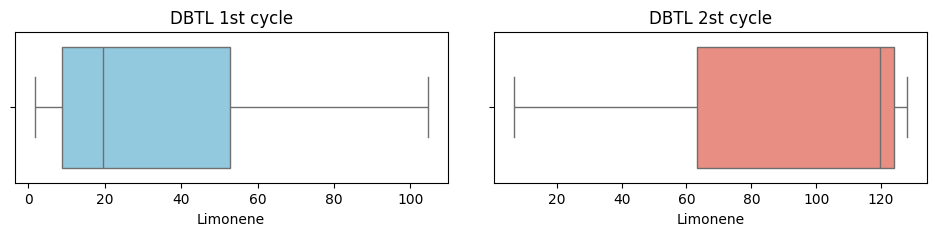

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(data=data_A, x='Limonene', ax=axes[0], color='skyblue')
sns.boxplot(data=data_B, x='Limonene', ax=axes[1], color='salmon')
axes[0].set_title('DBTL 1st cycle')
axes[1].set_title('DBTL 2st cycle')
fig.tight_layout(pad=3.0)
plt.show()

__PCA__

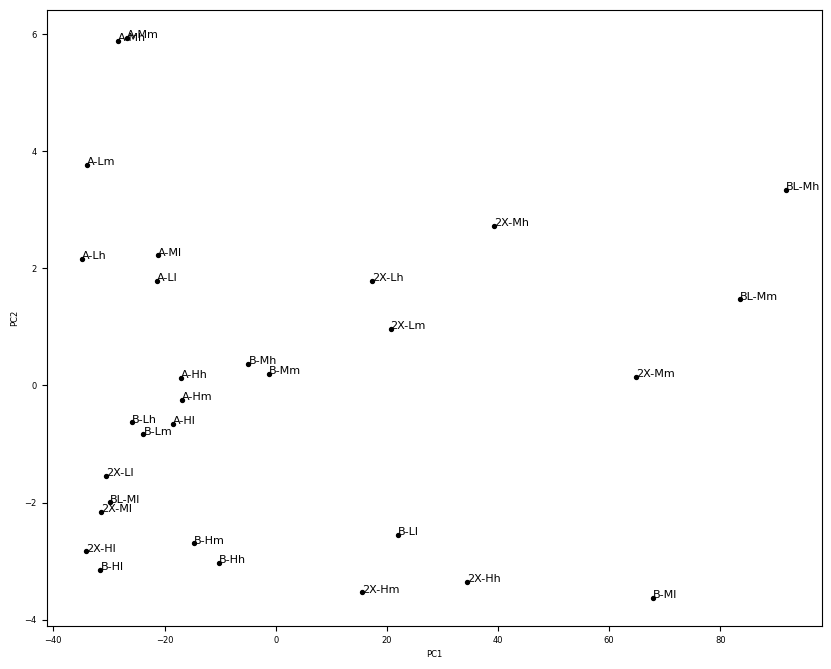

In [40]:
from sklearn.decomposition import PCA

def pca_analysis(df: pd.DataFrame, n_components=2) -> None:
    ''' Perform PCA analysis and plot results'''
    pca = PCA(n_components=n_components)
    pca_df = pd.DataFrame(pca.fit_transform(df))
    pca_df.index = df.index
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_df[0], pca_df[1], s=8, color='black')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.rcParams.update({'font.size': 8})
    for i, txt in enumerate(pca_df.index):
        plt.annotate(txt, (pca_df[0][i], pca_df[1][i]))
    plt.show()

pca_analysis(df)

In [33]:
data_B.index

Index(['BL-Mm', 'BL-Mh', 'BL-Ml'], dtype='object')